In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')

# Read the Dataset

In [14]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [16]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [17]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [18]:
cab.shape

(359392, 7)

In [19]:
cab.info

<bound method DataFrame.info of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52

In [20]:
transaction.shape

(440098, 3)

In [21]:
transaction.info

<bound method DataFrame.info of         Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]>

In [22]:
customer.shape

(49171, 4)

In [23]:
customer.info

<bound method DataFrame.info of        Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]>

In [24]:
city.shape

(20, 3)

In [25]:
city.info

<bound method DataFrame.info of                 City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021 >

In [26]:
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [27]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [28]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [29]:
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

# Data Cleaning & Visualization

In [30]:
for col in cab.columns:
    if ' ' in col:
        cab = cab.rename(columns={col:col.replace(' ','_')})

In [31]:
for col in transaction.columns:
    if ' ' in col:
        transaction = transaction.rename(columns={col:col.replace(' ','_')})

In [32]:
for col in customer.columns:
    if ' ' in col:
        customer = customer.rename(columns={col:col.replace(' ','_')})

In [33]:
cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [34]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [35]:
# changing format of the date 
cab['Date_of_Travel'] = cab['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [36]:
cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [37]:
# creating new culomns for the date 
months=[]
years =[]
for i in range(len(cab['Date_of_Travel'])):
    months.append(cab['Date_of_Travel'][i].month)
    years.append(cab['Date_of_Travel'][i].year)
cab['Month'] = months
cab['Year'] = years

cab.drop('Date_of_Travel', axis=1, inplace=True)

In [38]:
cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [39]:
# spliting the dataset into Pink Cab and Yellow Cab
PinkCab = cab[cab['Company']=='Pink Cab']
YellowCab = cab[cab['Company']=='Yellow Cab']

In [40]:
# travel frequency by month for Pink Cab
plot0 = cab[cab.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

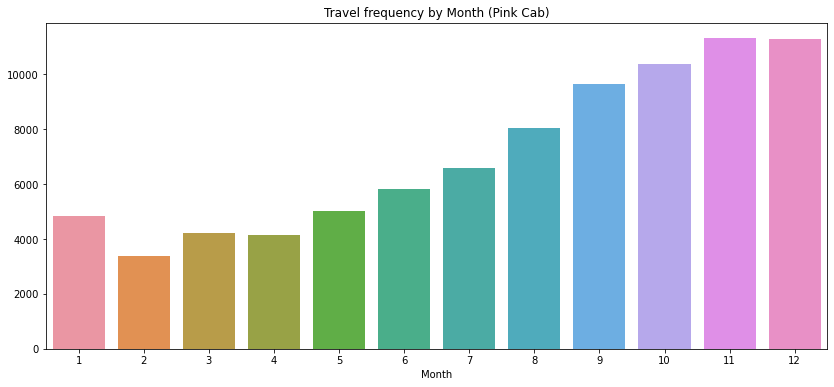

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)')
plt.show()

In [42]:
# travel frequency by month for Yellow Cab
plot10 = cab[cab.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot10

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

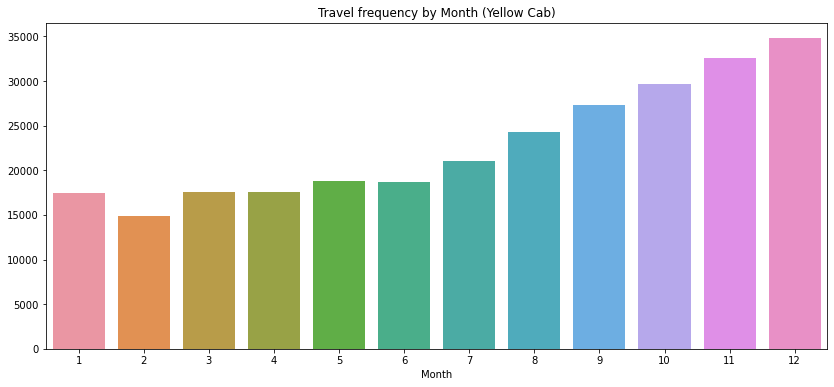

In [43]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot10.index,y=plot10.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()

In [44]:
# Yellow Cab has higher travels compared to Pink Cab.

In [45]:
overall_distance = cab['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [46]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


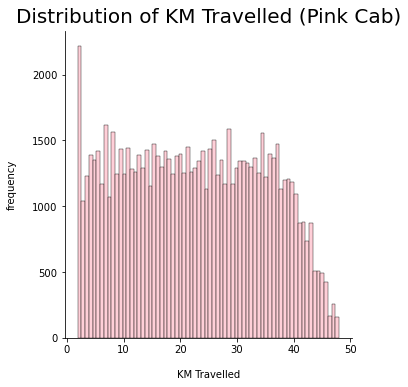

In [47]:
# Distribution of KM Travelled for Pink Cab
ax = sns.displot(PinkCab['KM_Travelled'], kde=False, color='pink', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

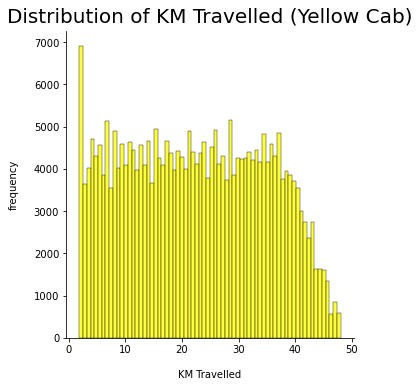

In [48]:
# Distribution of KM Travelled for Yellow Cab
ax = sns.displot(YellowCab['KM_Travelled'], kde=False, color='yellow', bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

- most of the rides are in the range of approximately 2 to 48 KM.

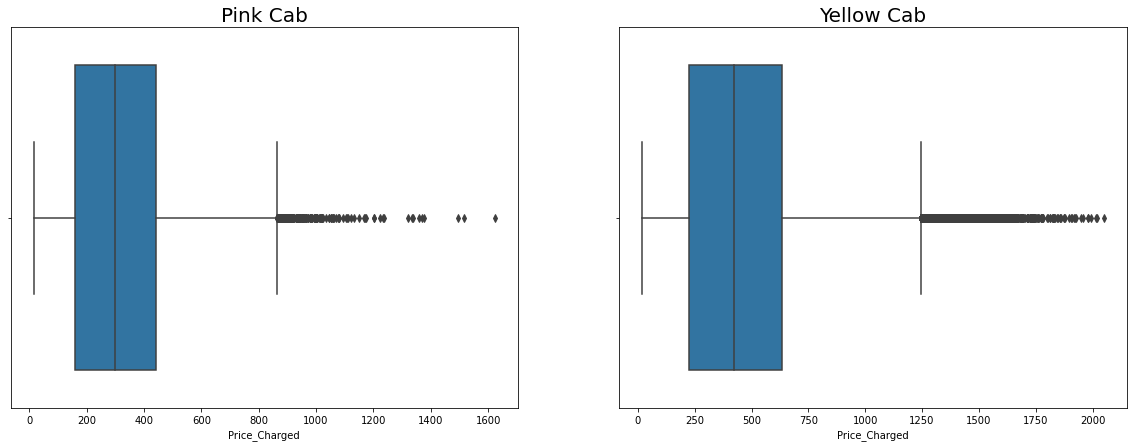

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

- The price charge range for Yellow cab is more than the Pink cab 

[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

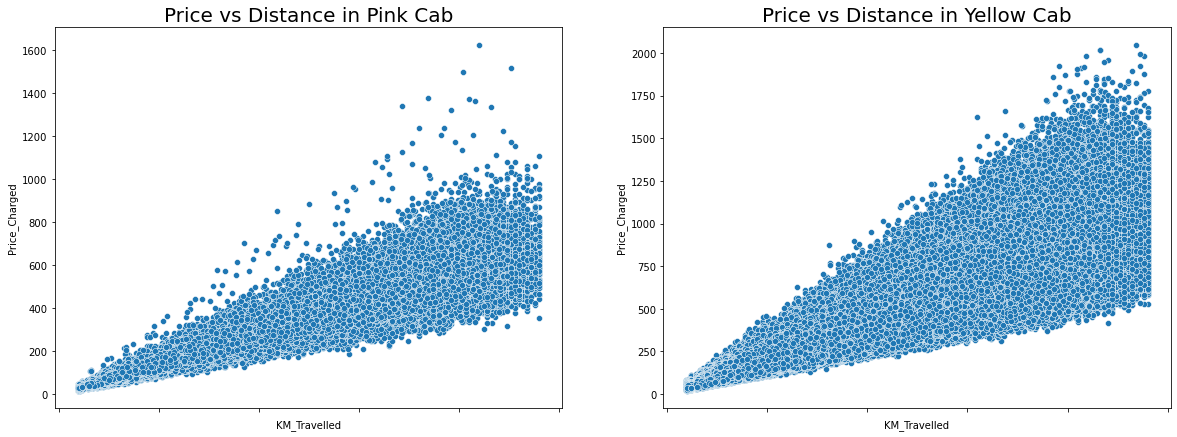

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=15)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)

In [51]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594862

In [52]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

0.8597086294478499

- There is a positive correlation in the graph for both Pink and Yellow cab.
- The price for Yellow cab is higher compared to Pink cab.

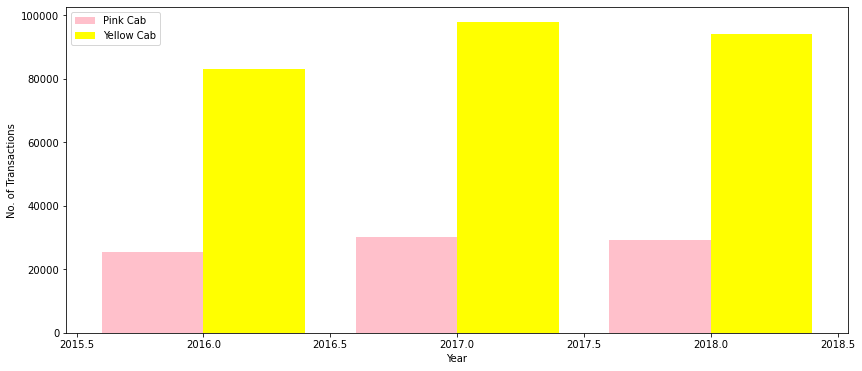

In [53]:
plot1 = cab[cab.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = cab[cab.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

- It shows that on yearly basis no. of transactions for Yellow cab is higher than Pink cab.

### Pink Cab

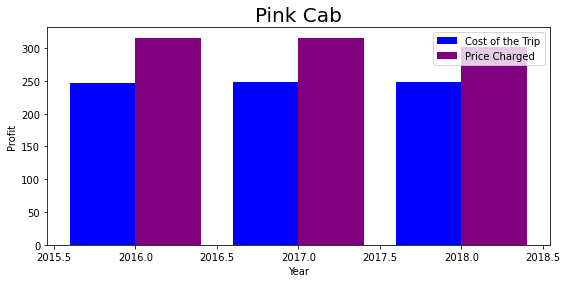

In [54]:
plot1 = cab[cab.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = cab[cab.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = cab[cab.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='purple', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

In [55]:
cab[cab.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

Year
2016    315.850071
2017    315.535059
2018    301.538134
Name: Price_Charged, dtype: float64

In [56]:
cab[cab.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    247.039209
2017    248.820917
2018    248.413839
Name: Cost_of_Trip, dtype: float64

### Yellow Cab

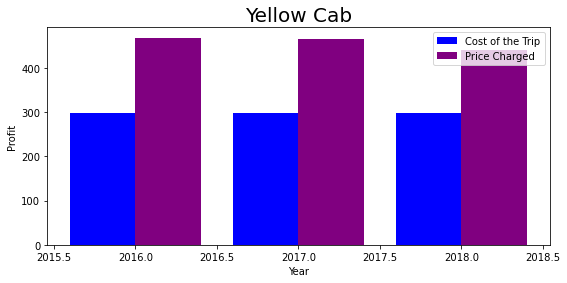

In [57]:
plot1 = cab[cab.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = cab[cab.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = cab[cab.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='purple', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [58]:
cab[cab.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

Year
2016    468.230462
2017    466.278438
2018    440.893159
Name: Price_Charged, dtype: float64

In [59]:
cab[cab.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

Year
2016    298.536761
2017    297.861544
2018    297.442400
Name: Cost_of_Trip, dtype: float64

- The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab

Text(0.5, 0, 'Pink Cab KM Travelled')

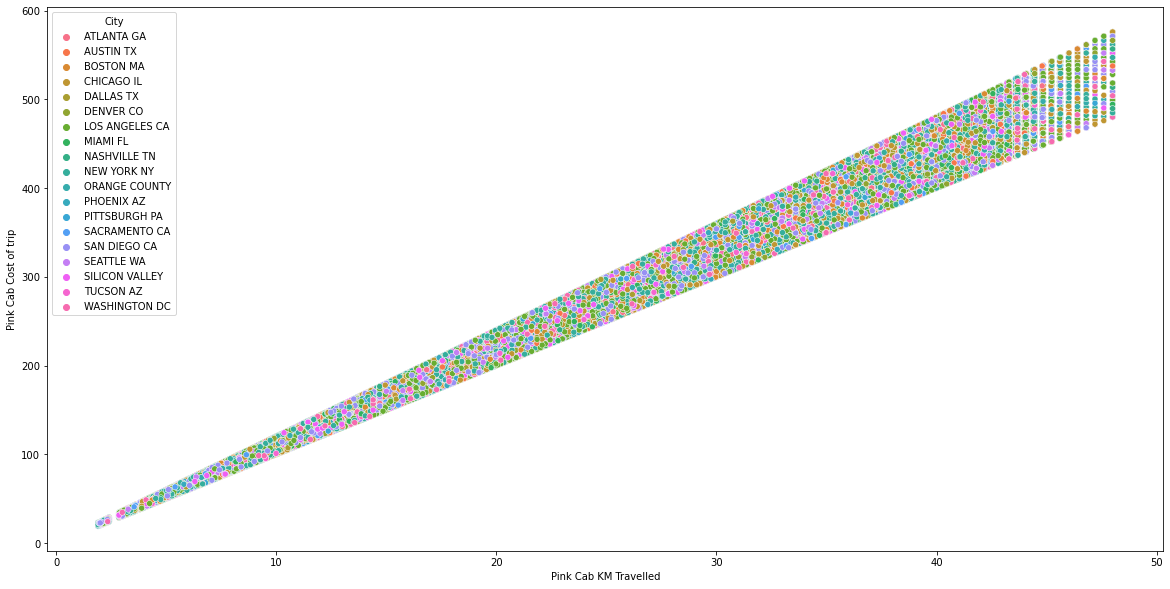

In [60]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

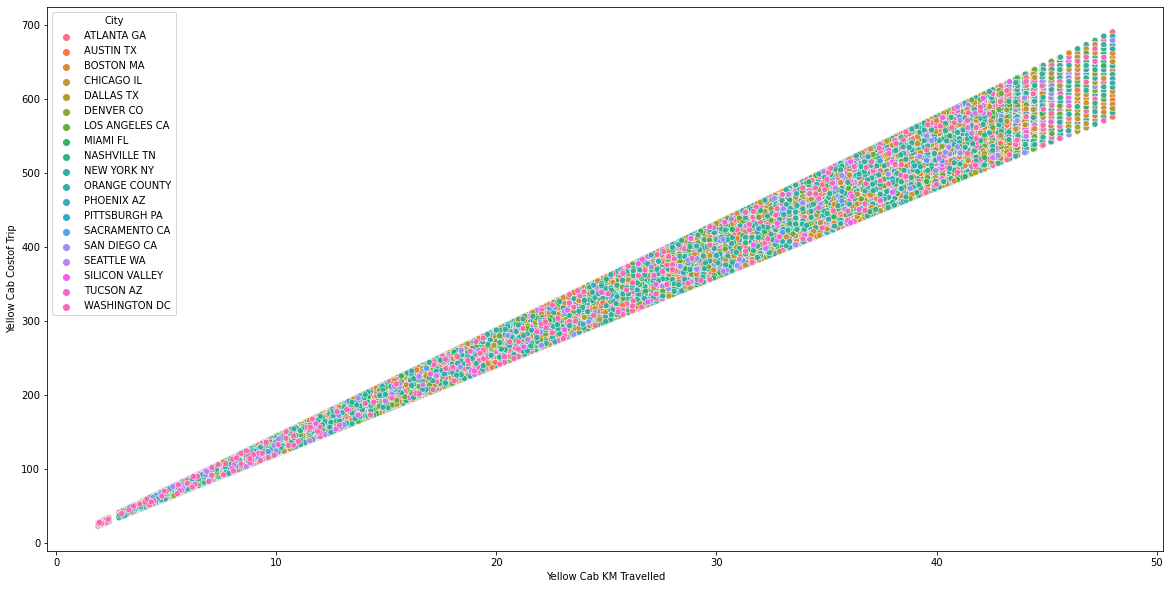

In [61]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.ylabel('Yellow Cab Costof Trip')
plt.xlabel('Yellow Cab KM Travelled')

- From the graph we see that the cost of trip for both Pink and Yellow cab are almost the same.

Text(0.5, 0, 'Pink Cab KM Travelled')

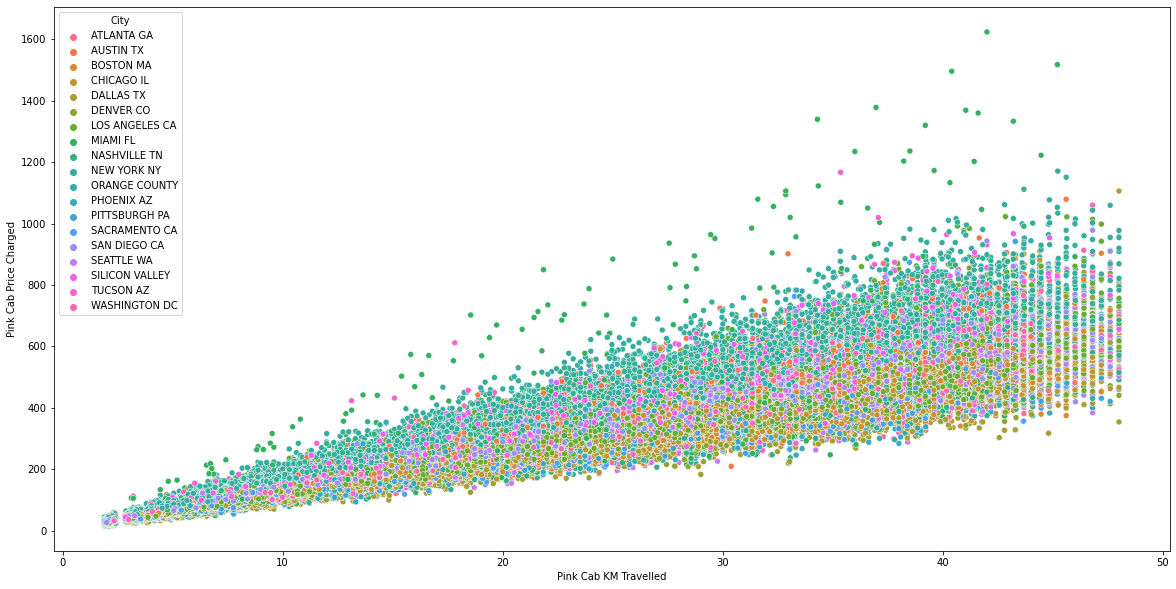

In [62]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.ylabel('Pink Cab Price Charged')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Yellow Cab KM Travelled')

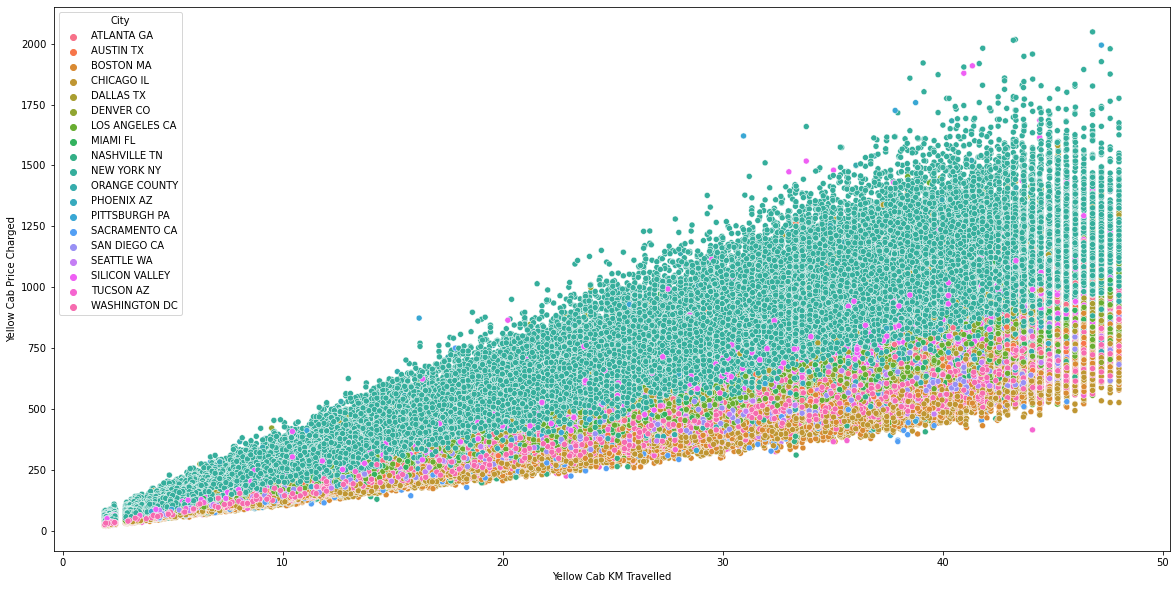

In [63]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.ylabel('Yellow Cab Price Charged')
plt.xlabel('Yellow Cab KM Travelled')

- From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities.
- and for Pink cab all the cities have the same increase in prices with increase in distance
- the outliers exist in both the graphs which may be due to high end cars or weather.

# Creating Master Data

In [64]:
left = cab.set_index(['Transaction_ID'])
right = transaction.set_index(['Transaction_ID'])
data = left.join(right)
data

,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
Transaction_ID,,,,,,,,,
10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...
10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,52392,Cash
10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,53286,Cash
10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,52265,Cash


In [65]:
left = data.set_index([data.index,'Customer_ID'])
right = customer.set_index(['Customer_ID'])
data = left.join(right)
data

,,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month)
Transaction_ID,Customer_ID,,,,,,,,,,,
10000011,29290,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,Card,Male,28,10813
10000012,27703,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,Card,Male,27,9237
10000013,28712,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242
10000014,28020,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327
10000015,27182,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651
10440104,53286,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528
10440105,52265,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966


In [66]:
left = data.set_index([data.index,'City'])
right = city.set_index(['City'])
data = left.join(right)
data

,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.6350,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.8540,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.6320,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.6020,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.7760,1,2016,Card,Male,33,8536,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001"
10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001"
10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001"


In [67]:
data.info

<bound method DataFrame.info of                                              Company  KM_Travelled  \
Transaction_ID Customer_ID City                                      
10000011       29290       ATLANTA GA       Pink Cab         30.45   
10000012       27703       ATLANTA GA       Pink Cab         28.62   
10000013       28712       ATLANTA GA       Pink Cab          9.04   
10000014       28020       ATLANTA GA       Pink Cab         33.17   
10000015       27182       ATLANTA GA       Pink Cab          8.73   
...                                              ...           ...   
10440101       52392       WASHINGTON DC  Yellow Cab          4.80   
10440104       53286       WASHINGTON DC  Yellow Cab          8.40   
10440105       52265       WASHINGTON DC  Yellow Cab         27.75   
10440106       52175       WASHINGTON DC  Yellow Cab          8.80   
10440107       52917       WASHINGTON DC  Yellow Cab         12.76   

                                          Price_Charged  

In [68]:
data = data.reset_index()

In [69]:
data = data.rename(columns={'Income_(USD/Month)':'Income'})

In [70]:
city_users = data.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [71]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

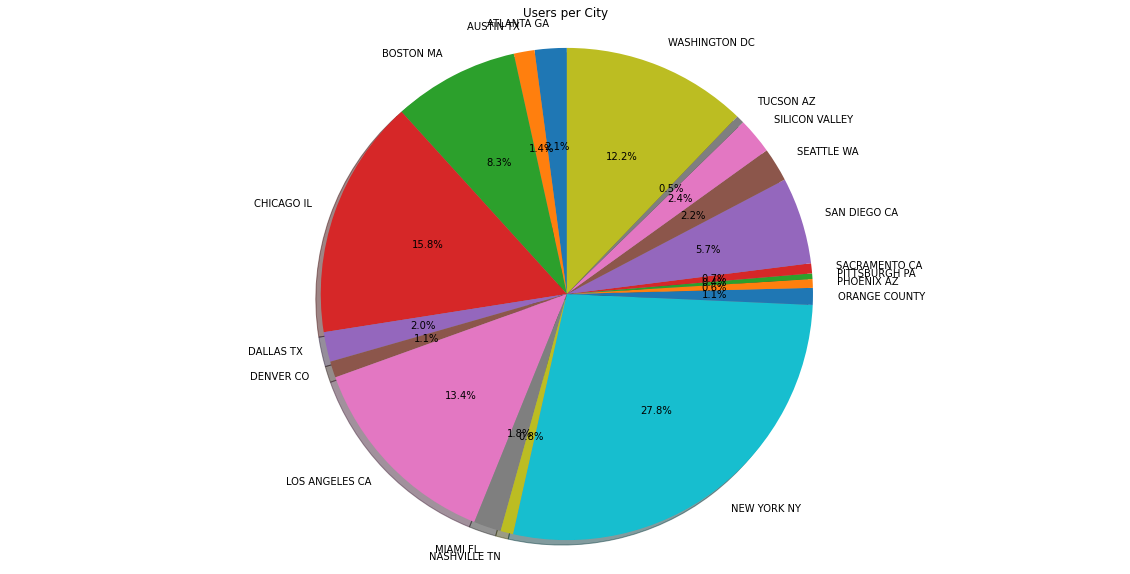

In [72]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users per City')
plt.show()

- New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%

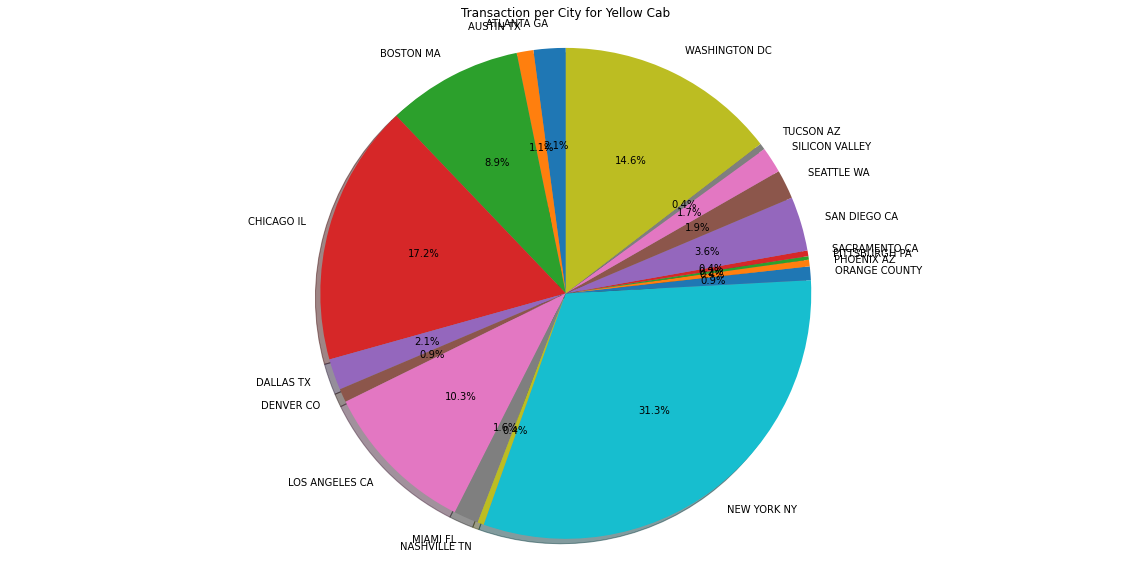

In [73]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [74]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

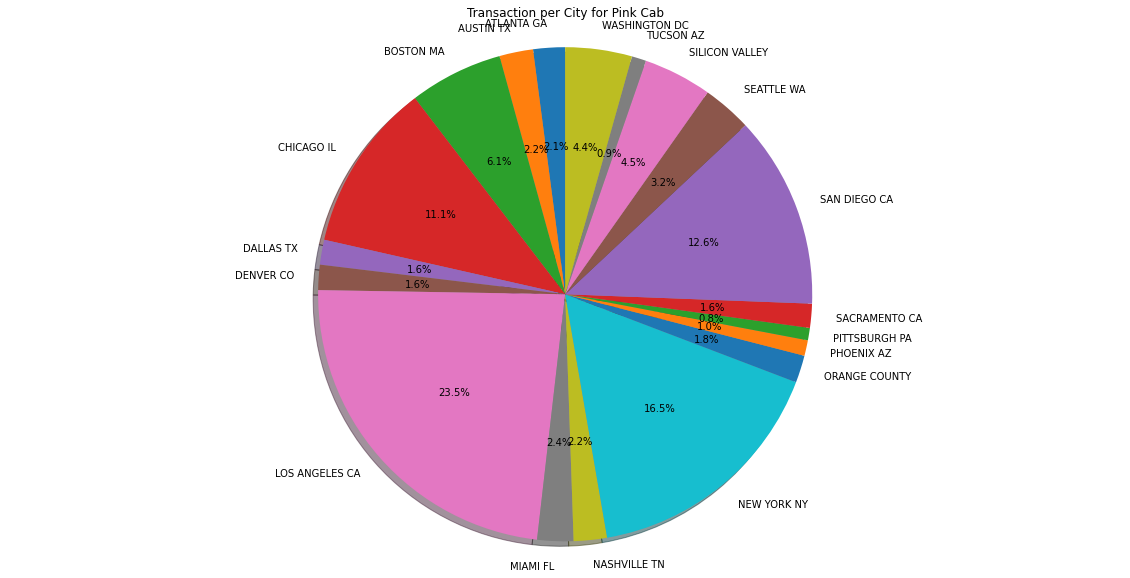

In [75]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

- Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%
- Transaction for Pink Cab is highest in Los Angeles City

In [76]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

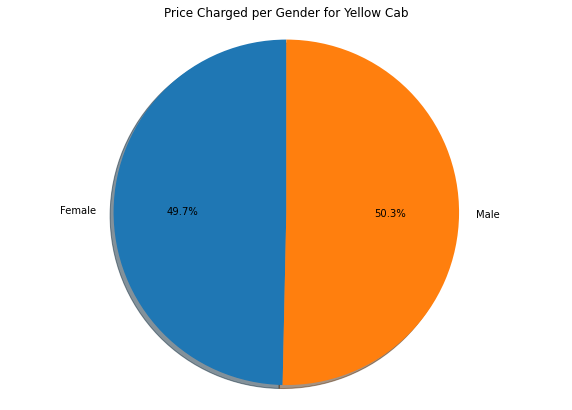

In [77]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [78]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

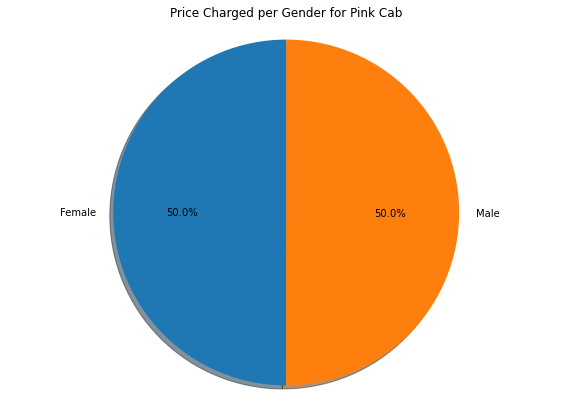

In [99]:
labs = gender_p.index
vals = gender_p.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

- Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

In [80]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

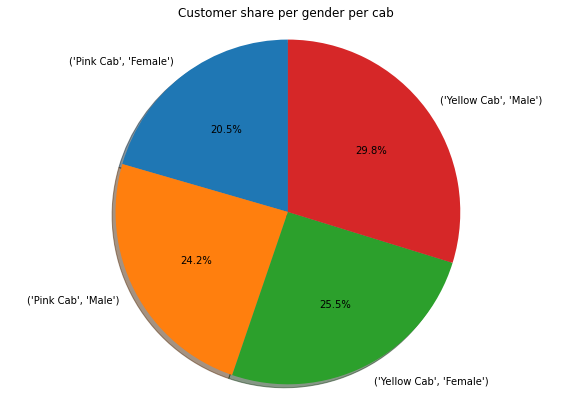

In [81]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

- Female Customers in Yellow Cab is higher compared to Male customers

In [82]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


In [83]:
data.tail()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
359387,10440101,52392,WASHINGTON DC,Yellow Cab,4.80,69.24,63.3600,1,2018,Cash,Male,24,15651,"418,859","127,001",5.8800
359388,10440104,53286,WASHINGTON DC,Yellow Cab,8.40,113.75,106.8480,1,2018,Cash,Male,32,6528,"418,859","127,001",6.9020
359389,10440105,52265,WASHINGTON DC,Yellow Cab,27.75,437.07,349.6500,1,2018,Cash,Male,56,7966,"418,859","127,001",87.4200
359390,10440106,52175,WASHINGTON DC,Yellow Cab,8.80,146.19,114.0480,1,2018,Card,Male,32,6423,"418,859","127,001",32.1420
359391,10440107,52917,WASHINGTON DC,Yellow Cab,12.76,191.58,177.6192,1,2018,Card,Male,20,11284,"418,859","127,001",13.9608


In [84]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Age,Income,Margins
KM_Travelled,1.000000,0.835753,0.981848,-0.001773,-0.001094,-0.000369,-0.000544,0.462768
Price_Charged,0.835753,1.000000,0.859812,-0.059639,-0.036903,-0.003084,0.003228,0.864154
Cost_of_Trip,0.981848,0.859812,1.000000,-0.008309,-0.001766,-0.000189,-0.000633,0.486056
Month,-0.001773,-0.059639,-0.008309,1.000000,-0.033169,-0.002376,0.000585,-0.093886
Year,-0.001094,-0.036903,-0.001766,-0.033169,1.000000,-0.000497,-0.001679,-0.061420
Age,-0.000369,-0.003084,-0.000189,-0.002376,-0.000497,1.000000,0.003907,-0.005093
Income,-0.000544,0.003228,-0.000633,0.000585,-0.001679,0.003907,1.000000,0.006148
Margins,0.462768,0.864154,0.486056,-0.093886,-0.061420,-0.005093,0.006148,1.000000


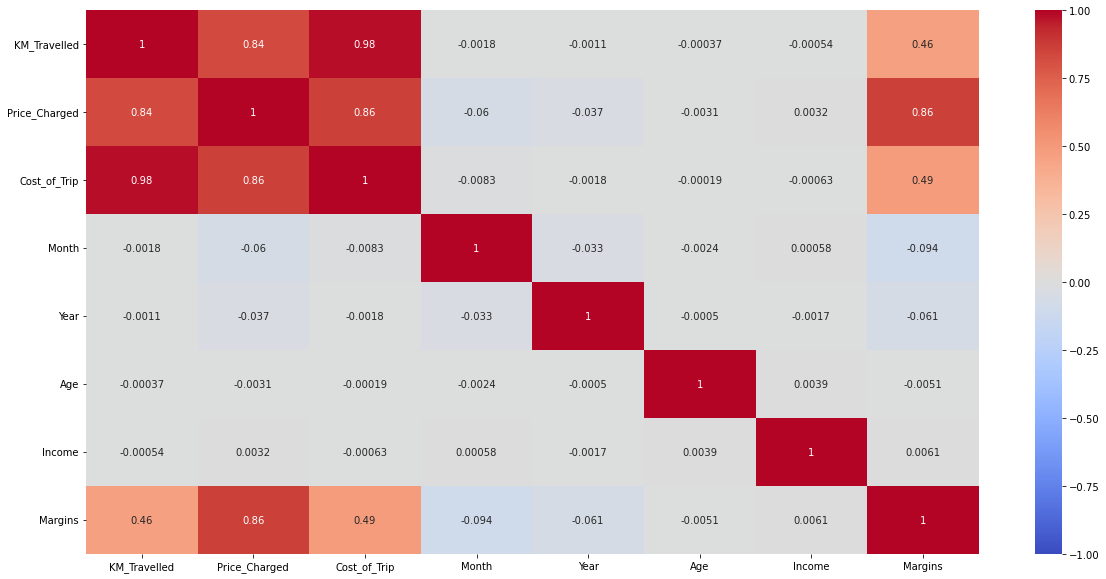

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

- There is a correlation between Margin & Price_Charged

In [86]:
city_m = data[data.Month==12].groupby('City').Margins.mean()
city_m

City
ATLANTA GA         96.252930
AUSTIN TX          91.891400
BOSTON MA          62.360750
CHICAGO IL         52.396687
DALLAS TX         109.465216
DENVER CO         111.138893
LOS ANGELES CA     81.752667
MIAMI FL          100.150911
NASHVILLE TN       81.459593
NEW YORK NY       258.421581
ORANGE COUNTY      76.134553
PHOENIX AZ         76.922806
PITTSBURGH PA      57.105846
SACRAMENTO CA      27.119039
SAN DIEGO CA       70.382592
SEATTLE WA         76.515311
SILICON VALLEY    167.087114
TUCSON AZ          84.105100
WASHINGTON DC      62.742899
Name: Margins, dtype: float64

In [87]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})


### Monthly Margins of Pink Cab

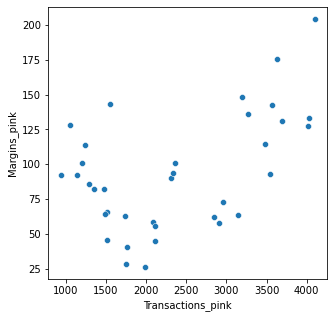

In [88]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

- Pink Cabs increase their margins with increase in number of Transactions

### Margins for Yellow cabs

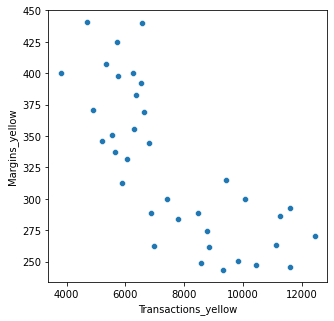

In [89]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

- Yellow Cab decrease the Margin with the increase in Transaction

# Hypothesis Testing

#### Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [90]:
a = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


- Yellow Cab: There is difference in Margin between Male and Female customers

#### For Pink Cabs

In [91]:
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


- Pink Cab: There is no difference in Margin between Male and Female customers

In [92]:
#Margins per Age
data[data.Age<=50].groupby('Company').Margins.mean()
data[data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [93]:
#Pink Cab
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [94]:
#Yellow Cab
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09


- Yellow Cabs also gives discount to people older than 50
- Is there difference in margins for Card payer and Cash payers

In [95]:
#Pink Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [96]:
#Yellow Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


- There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab

In [97]:
data.head()

,Transaction_ID,Customer_ID,City,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income,Population,Users,Margins
0,10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
1,10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
2,10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
3,10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
4,10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


In [98]:
data.to_csv('master_data.csv',index = False)